# Визуализация определения предела последовательности

Иллюстрация определения предела на примере:

$$\lim_{n \to \infty} \frac{2n + 1}{n} = 2$$


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

# Настройки для Retina дисплеев
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 144

# Стиль и размеры
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11


In [96]:
# Определяем последовательность
def a_n(n):
    """Последовательность a_n = (2n + 1) / n"""
    return (2 * n + 1) / n

# Предел последовательности
limit = 2

# Вычисляем элементы последовательности
n_values = np.arange(1, 51)
a_values = a_n(n_values)

# Вывод информации
display(Markdown(r"**Последовательность:** $a_n = \frac{2n + 1}{n}$"))
display(Markdown(rf"**Предел:** $A = {limit}$"))
display(Markdown(""))

# Первые 10 элементов через запятую
elements_str = ", ".join([f"{a_values[i]:.4f}" for i in range(10)])
display(Markdown(rf"**Первые 10 элементов:** ${elements_str}, \ldots$"))


**Последовательность:** $a_n = \frac{2n + 1}{n}$

**Предел:** $A = 2$

**Первые 10 элементов:** $3.0000, 2.5000, 2.3333, 2.2500, 2.2000, 2.1667, 2.1429, 2.1250, 2.1111, 2.1000, \ldots$

## График 1: Иллюстрация определения с $\varepsilon$ и $N$

Для любого $\varepsilon > 0$ находим $N$ такое, что при $n > N$ все элементы попадают в $\varepsilon$-окрестность предела.


In [97]:
def plot_limit_illustration(epsilon, n_max=50):
    """
    Визуализация определения предела с заданным epsilon
    
    Parameters:
    -----------
    epsilon : float
        Радиус окрестности вокруг предела
    n_max : int
        Максимальный номер элемента для отображения
    """
    # Вычисляем N по формуле N = ⌈1/ε⌉
    N = int(np.ceil(1 / epsilon))
    
    # Вычисляем элементы последовательности
    n_values = np.arange(1, n_max + 1)
    a_values = a_n(n_values)
    
    # Создаём график
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Рисуем элементы последовательности ДО N (красные)
    mask_before = n_values <= N
    ax.scatter(n_values[mask_before], a_values[mask_before], 
               color='red', s=50, alpha=0.7, label=rf'Элементы при $n \leq N={N}$', zorder=3)
    
    # Рисуем элементы последовательности ПОСЛЕ N (зелёные)
    mask_after = n_values > N
    ax.scatter(n_values[mask_after], a_values[mask_after], 
               color='green', s=50, alpha=0.7, label=rf'Элементы при $n > N={N}$', zorder=3)
    
    # Линия предела
    ax.axhline(y=limit, color='blue', linestyle='--', linewidth=2, label=rf'Предел $A = {limit}$')
    
    # ε-окрестность (горизонтальная полоса)
    ax.axhspan(limit - epsilon, limit + epsilon, alpha=0.2, color='blue', 
               label=rf'$\varepsilon$-окрестность: $({limit - epsilon:.3f}, {limit + epsilon:.3f})$')
    
    # Границы окрестности
    ax.axhline(y=limit + epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    ax.axhline(y=limit - epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    
    # Вертикальная линия N
    ax.axvline(x=N, color='orange', linestyle='--', linewidth=2, alpha=0.7, 
               label=rf'$N = \lceil 1/\varepsilon \rceil = {N}$')
    
    # Настройки графика
    ax.set_xlabel(r'$n$ (номер элемента)', fontsize=13, fontweight='bold')
    ax.set_ylabel(r'$a_n = \frac{2n + 1}{n}$', fontsize=13, fontweight='bold')
    ax.set_title(rf'Определение предела: $\varepsilon = {epsilon}$, $N = {N}$' + '\n' + 
                 rf'При $n > {N}$ все элементы в $\varepsilon$-окрестности предела',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, n_max)
    
    plt.tight_layout()
    plt.show()
    
    # Проверка: все ли элементы после N попадают в окрестность?
    elements_after_N = a_values[mask_after]
    if len(elements_after_N) > 0:
        all_in_range = np.all(np.abs(elements_after_N - limit) < epsilon)
        max_dev = np.max(np.abs(elements_after_N - limit))
        display(Markdown(rf"✓ **Проверка:** при $n > {N}$ все элементы в $\varepsilon$-окрестности: **{all_in_range}**"))
        display(Markdown(rf"&nbsp;&nbsp;&nbsp;&nbsp;Максимальное отклонение: ${max_dev:.6f} < \varepsilon = {epsilon}$"))


### Три примера с разными значениями $\varepsilon$


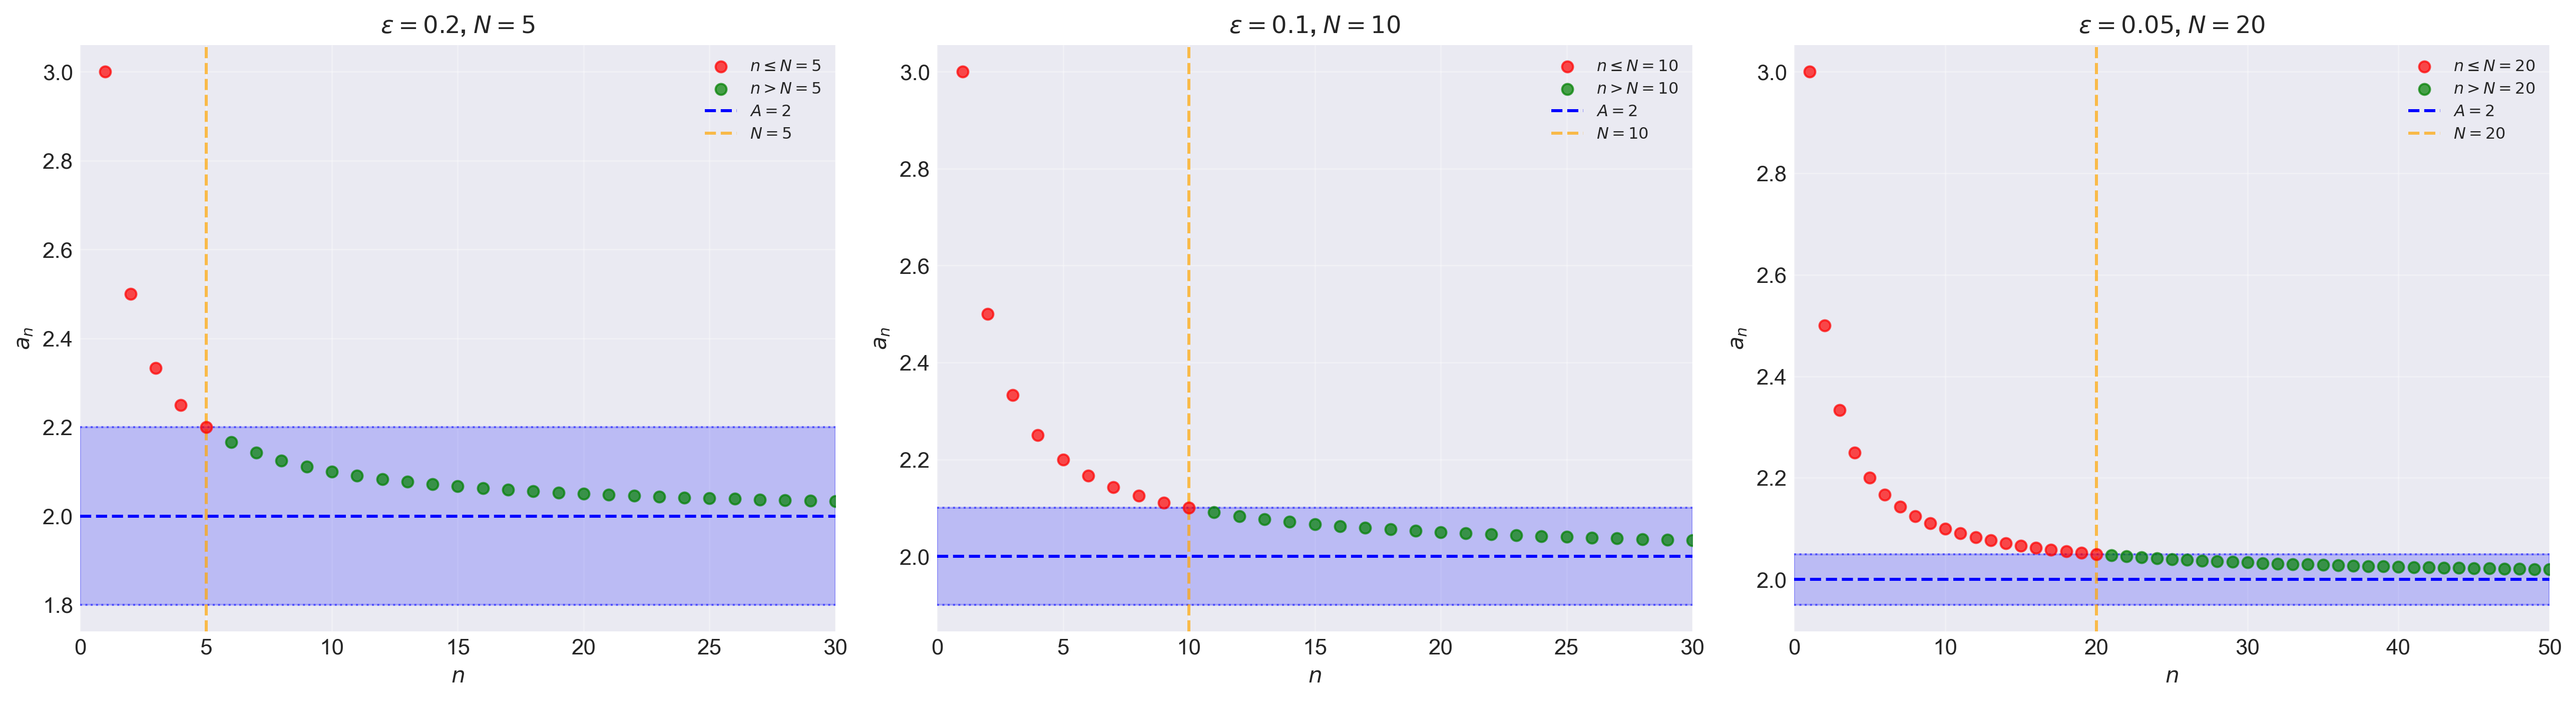

✓ **Проверка для $\varepsilon = 0.2$:** при $n > 5$ все элементы в окрестности

✓ **Проверка для $\varepsilon = 0.1$:** при $n > 10$ все элементы в окрестности

✓ **Проверка для $\varepsilon = 0.05$:** при $n > 20$ все элементы в окрестности

In [98]:
# Функция для отрисовки на одном subplot
def plot_on_axis(ax, epsilon, n_max=50):
    """Рисует график определения предела на заданном axis"""
    N = int(np.ceil(1 / epsilon))
    n_values = np.arange(1, n_max + 1)
    a_values = a_n(n_values)
    
    mask_before = n_values <= N
    mask_after = n_values > N
    
    # Рисуем точки
    ax.scatter(n_values[mask_before], a_values[mask_before], 
               color='red', s=30, alpha=0.7, label=rf'$n \leq N={N}$', zorder=3)
    ax.scatter(n_values[mask_after], a_values[mask_after], 
               color='green', s=30, alpha=0.7, label=rf'$n > N={N}$', zorder=3)
    
    # Предел и окрестность
    ax.axhline(y=limit, color='blue', linestyle='--', linewidth=1.5, label=rf'$A = {limit}$')
    ax.axhspan(limit - epsilon, limit + epsilon, alpha=0.2, color='blue')
    ax.axhline(y=limit + epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    ax.axhline(y=limit - epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    ax.axvline(x=N, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, 
               label=rf'$N = {N}$')
    
    # Настройки
    ax.set_xlabel(r'$n$', fontsize=11, fontweight='bold')
    ax.set_ylabel(r'$a_n$', fontsize=11, fontweight='bold')
    ax.set_title(rf'$\varepsilon = {epsilon}$, $N = {N}$', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, n_max)
    
    return N, n_values, a_values, mask_after

# Создаём 3 subplot'а
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Три примера с разными epsilon
N1, n1, a1, mask1 = plot_on_axis(ax1, epsilon=0.2, n_max=30)
N2, n2, a2, mask2 = plot_on_axis(ax2, epsilon=0.1, n_max=30)
N3, n3, a3, mask3 = plot_on_axis(ax3, epsilon=0.05, n_max=50)

plt.tight_layout()
plt.show()

# Проверки
display(Markdown(rf"✓ **Проверка для $\varepsilon = 0.2$:** при $n > {N1}$ все элементы в окрестности"))
display(Markdown(rf"✓ **Проверка для $\varepsilon = 0.1$:** при $n > {N2}$ все элементы в окрестности"))
display(Markdown(rf"✓ **Проверка для $\varepsilon = 0.05$:** при $n > {N3}$ все элементы в окрестности"))


## График 2: Сходимость последовательности к пределу

Показываем как последовательность приближается к пределу при увеличении n.


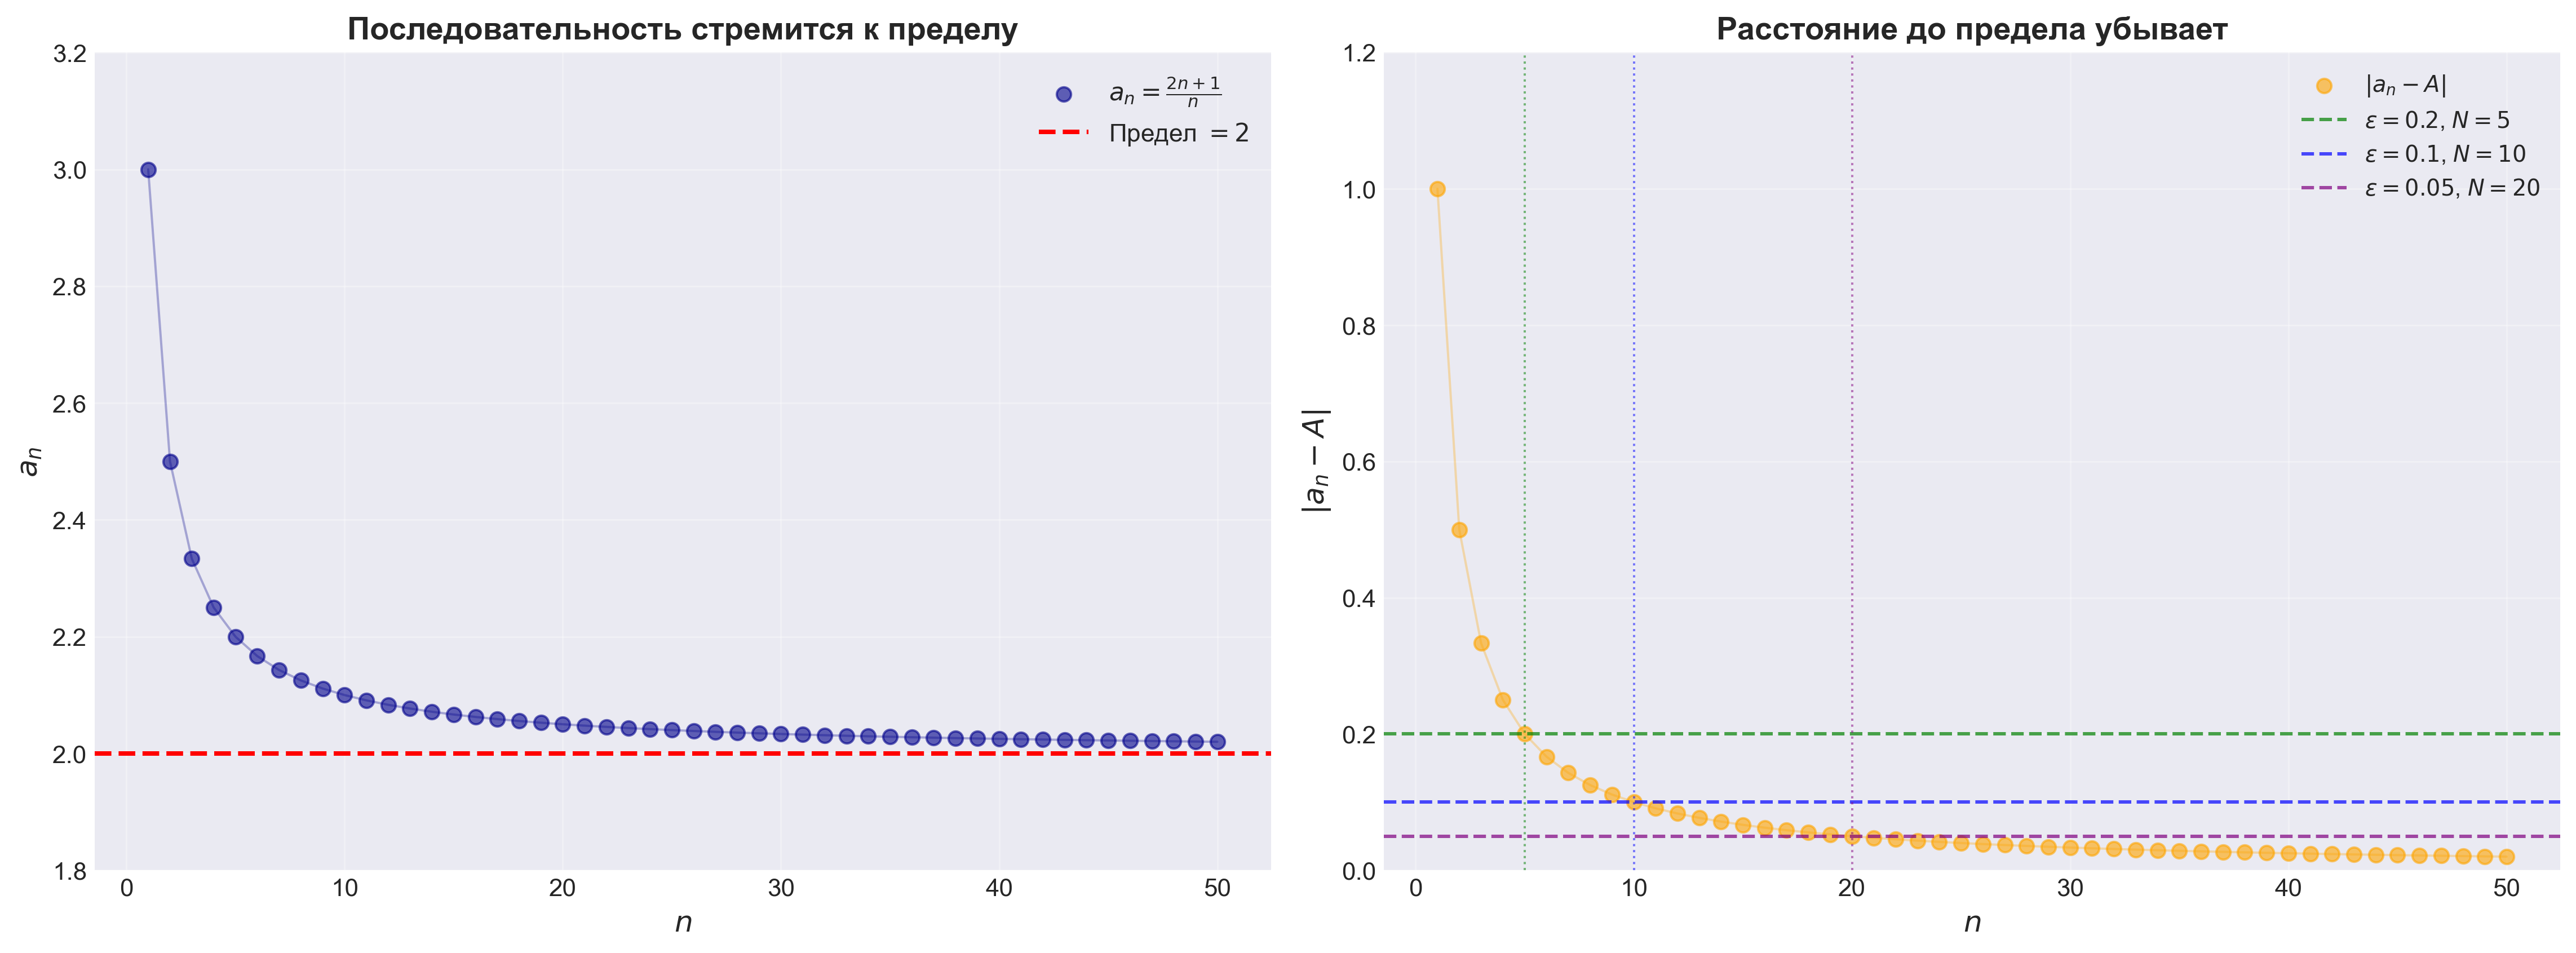

**Видно, что:**

1. Последовательность монотонно убывает и стремится к $2$

2. Расстояние $|a_n - 2| = \frac{1}{n}$ убывает к нулю

3. Для каждого $\varepsilon$ можно найти $N$, после которого все элементы ближе $\varepsilon$ к пределу

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Последовательность
n_values = np.arange(1, 51)
a_values = a_n(n_values)

ax1.scatter(n_values, a_values, color='darkblue', s=40, alpha=0.6, label=r'$a_n = \frac{2n+1}{n}$')
ax1.plot(n_values, a_values, color='darkblue', alpha=0.3, linewidth=1)
ax1.axhline(y=limit, color='red', linestyle='--', linewidth=2, label=rf'Предел $= {limit}$')
ax1.set_xlabel(r'$n$', fontsize=13, fontweight='bold')
ax1.set_ylabel(r'$a_n$', fontsize=13, fontweight='bold')
ax1.set_title('Последовательность стремится к пределу', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(1.8, 3.2)

# График 2: Расстояние до предела (отклонение)
deviations = np.abs(a_values - limit)

ax2.scatter(n_values, deviations, color='orange', s=40, alpha=0.6, label=r'$|a_n - A|$')
ax2.plot(n_values, deviations, color='orange', alpha=0.3, linewidth=1)

# Показываем для разных epsilon
epsilons = [0.2, 0.1, 0.05]
colors = ['green', 'blue', 'purple']
for eps, col in zip(epsilons, colors):
    N = int(np.ceil(1 / eps))
    ax2.axhline(y=eps, color=col, linestyle='--', linewidth=1.5, alpha=0.7, label=rf'$\varepsilon = {eps}$, $N = {N}$')
    ax2.axvline(x=N, color=col, linestyle=':', linewidth=1, alpha=0.5)

ax2.set_xlabel(r'$n$', fontsize=13, fontweight='bold')
ax2.set_ylabel(r'$|a_n - A|$', fontsize=13, fontweight='bold')
ax2.set_title('Расстояние до предела убывает', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

display(Markdown("**Видно, что:**"))
display(Markdown(r"1. Последовательность монотонно убывает и стремится к $2$"))
display(Markdown(r"2. Расстояние $|a_n - 2| = \frac{1}{n}$ убывает к нулю"))
display(Markdown(r"3. Для каждого $\varepsilon$ можно найти $N$, после которого все элементы ближе $\varepsilon$ к пределу"))


## График 3: Зависимость $N$ от $\varepsilon$

Показываем формулу $N(\varepsilon) = \lceil 1/\varepsilon \rceil$


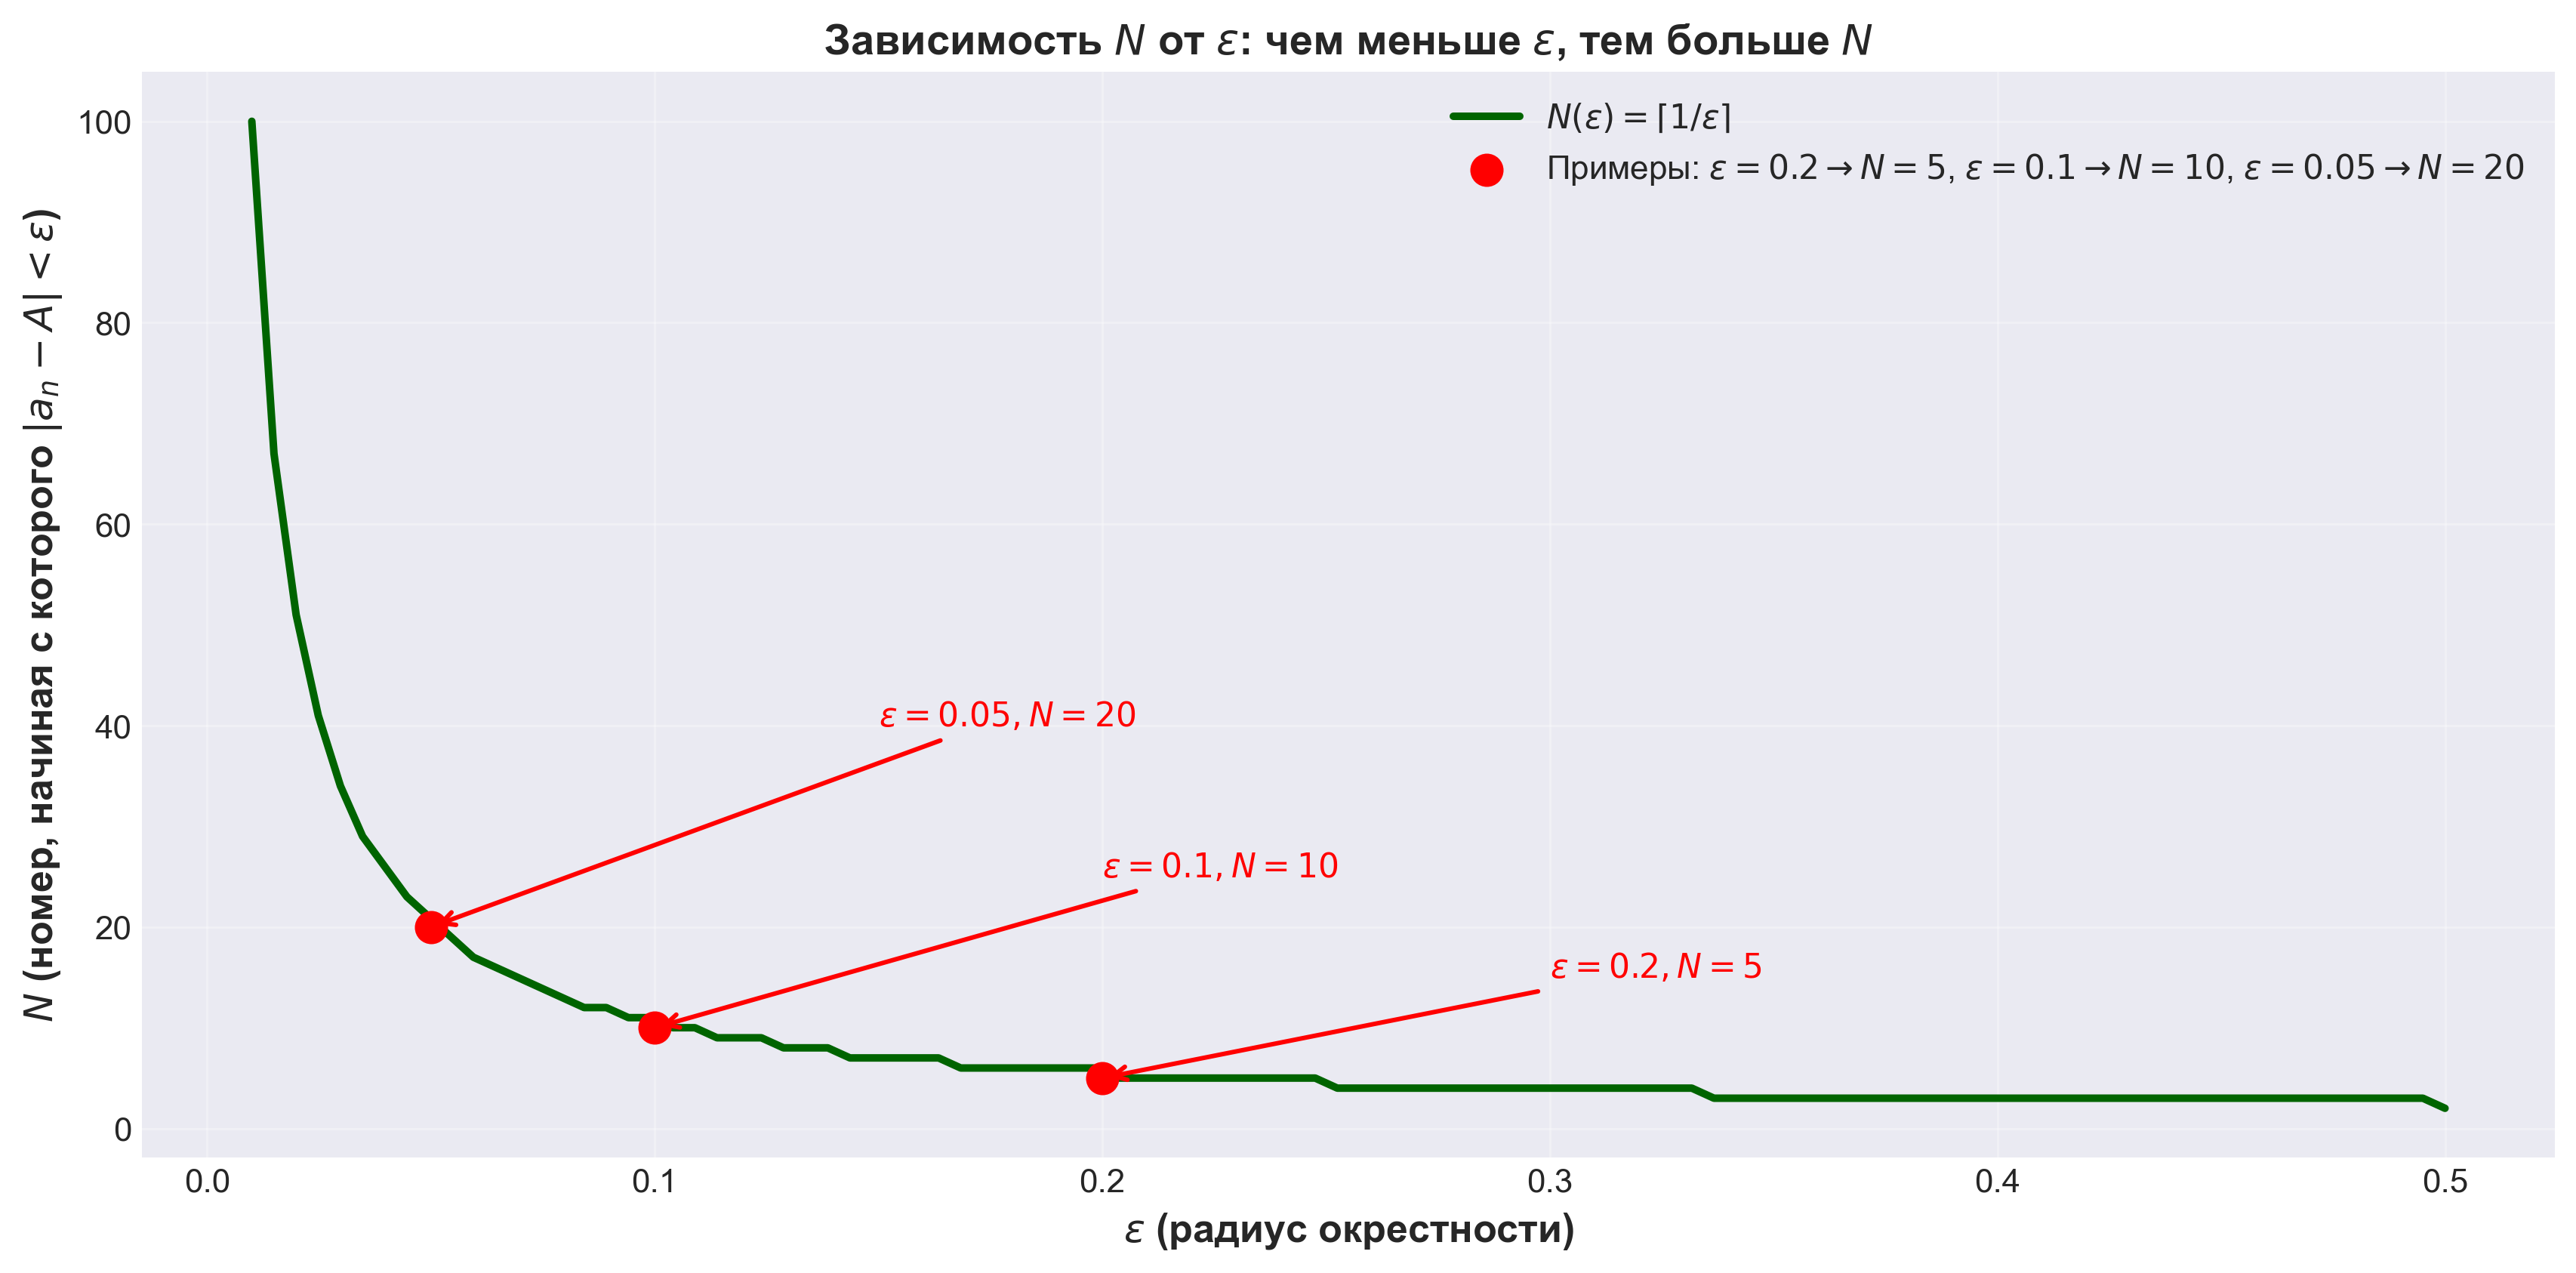

**Ключевая идея:**

• Формула $N(\varepsilon) = \lceil 1/\varepsilon \rceil$ работает для **ЛЮБОГО** $\varepsilon > 0$

• Чем меньше $\varepsilon$ (уже окрестность), тем больше нужен $N$ (дальше идти по последовательности)

• Это и есть суть определения: можем загнать последовательность в окрестность любой малости!

In [100]:
# Строим зависимость N от epsilon
epsilon_values = np.linspace(0.01, 0.5, 100)
N_values = np.ceil(1 / epsilon_values)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(epsilon_values, N_values, color='darkgreen', linewidth=2.5, label=r'$N(\varepsilon) = \lceil 1/\varepsilon \rceil$')
ax.scatter([0.2, 0.1, 0.05], [5, 10, 20], color='red', s=100, zorder=5, 
           label=r'Примеры: $\varepsilon=0.2 \to N=5$, $\varepsilon=0.1 \to N=10$, $\varepsilon=0.05 \to N=20$')

ax.set_xlabel(r'$\varepsilon$ (радиус окрестности)', fontsize=13, fontweight='bold')
ax.set_ylabel(r'$N$ (номер, начиная с которого $|a_n - A| < \varepsilon$)', fontsize=13, fontweight='bold')
ax.set_title(r'Зависимость $N$ от $\varepsilon$: чем меньше $\varepsilon$, тем больше $N$', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Аннотации
ax.annotate(r'$\varepsilon = 0.2, N = 5$', xy=(0.2, 5), xytext=(0.3, 15),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')
ax.annotate(r'$\varepsilon = 0.1, N = 10$', xy=(0.1, 10), xytext=(0.2, 25),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')
ax.annotate(r'$\varepsilon = 0.05, N = 20$', xy=(0.05, 20), xytext=(0.15, 40),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

display(Markdown(""))
display(Markdown("**Ключевая идея:**"))
display(Markdown(r"• Формула $N(\varepsilon) = \lceil 1/\varepsilon \rceil$ работает для **ЛЮБОГО** $\varepsilon > 0$"))
display(Markdown(r"• Чем меньше $\varepsilon$ (уже окрестность), тем больше нужен $N$ (дальше идти по последовательности)"))
display(Markdown(r"• Это и есть суть определения: можем загнать последовательность в окрестность любой малости!"))


## Выводы

### Что показывают графики:

1. **Определение предела** — для любого $\varepsilon > 0$ существует $N$ такое, что при $n > N$ все элементы последовательности попадают в $\varepsilon$-окрестность предела.

2. **Ключевая идея** — $N$ зависит от $\varepsilon$ по формуле $N(\varepsilon) = \lceil 1/\varepsilon \rceil$. Эта формула работает для **любого** $\varepsilon > 0$.

3. **Два процесса:**
   - **Вычисление предела:** используем алгебру → получаем $A = 2$
   - **Доказательство предела:** находим формулу $N(\varepsilon)$ → показываем, что определение выполнено

4. **Геометрический смысл:**
   - **Синяя полоса** — $\varepsilon$-окрестность предела (по оси Y)
   - **Оранжевая линия** — номер $N$ (по оси X)
   - **Красные точки** — элементы до $N$ (могут быть вне окрестности)
   - **Зелёные точки** — элементы после $N$ (все в окрестности!)

### Для нашего примера: $a_n = \frac{2n + 1}{n}$

- Предел: **$A = 2$**
- Формула N: **$N(\varepsilon) = \lceil 1/\varepsilon \rceil$**
- Работает для любого $\varepsilon$! ✓


## Попробуйте сами!

Измените значение $\varepsilon$ и посмотрите, как изменится $N$:


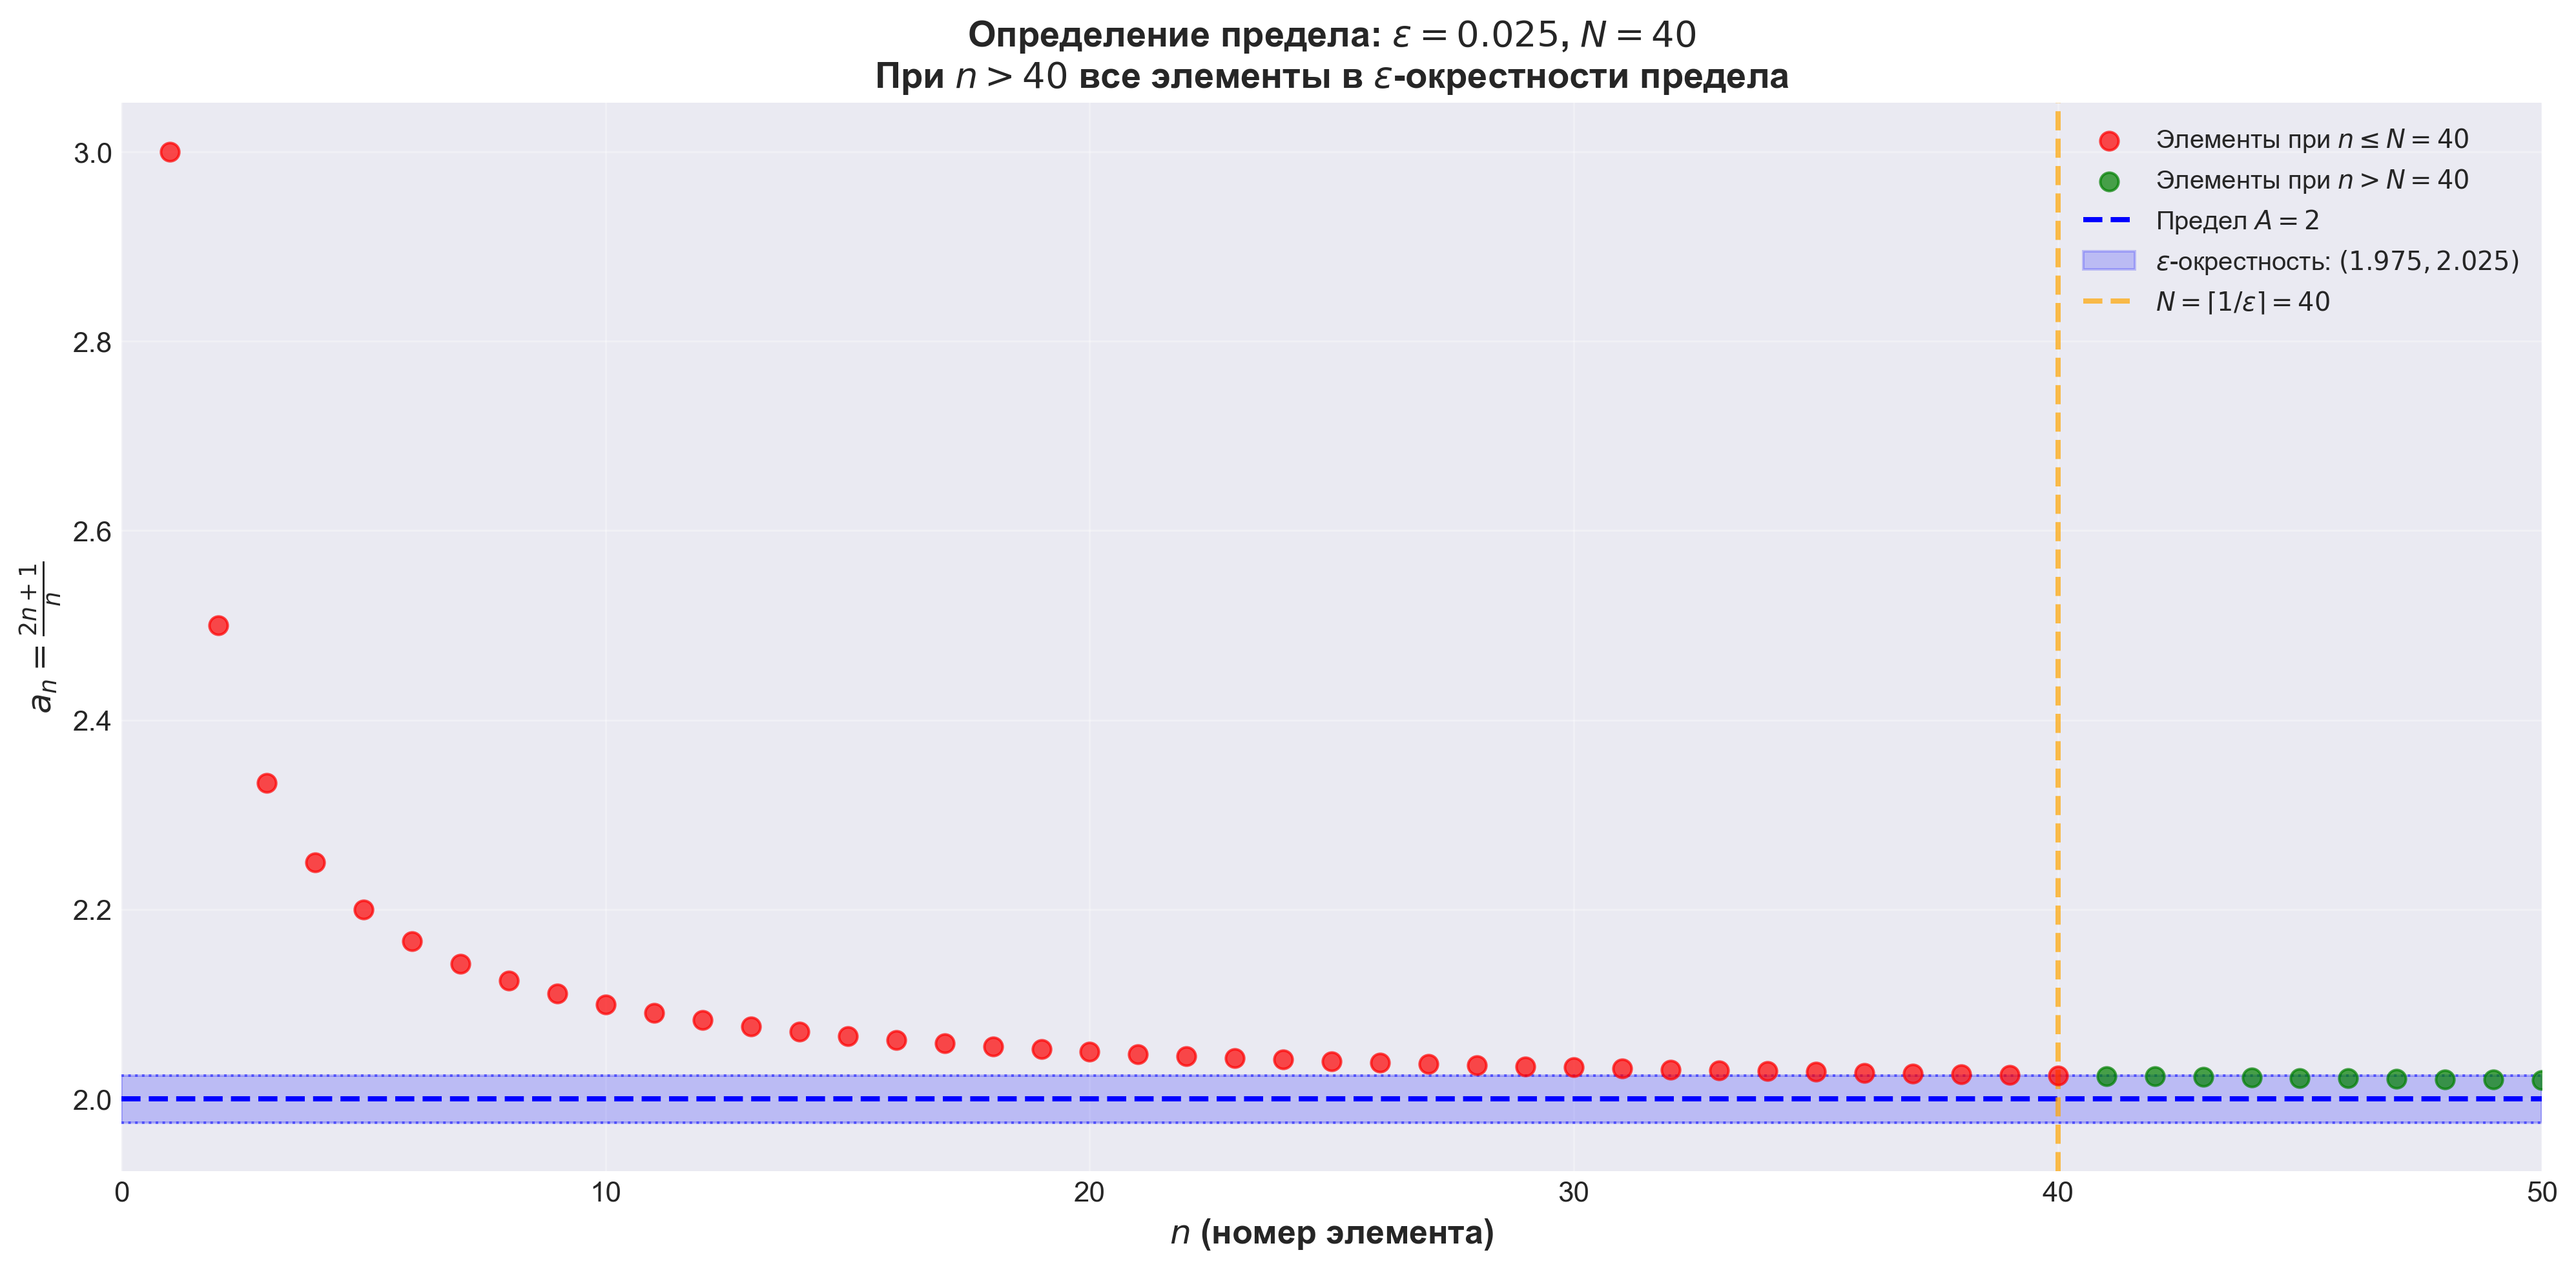

✓ **Проверка:** при $n > 40$ все элементы в $\varepsilon$-окрестности: **True**

&nbsp;&nbsp;&nbsp;&nbsp;Максимальное отклонение: $0.024390 < \varepsilon = 0.025$

In [101]:
# Попробуйте разные значения epsilon!
# Например: 0.3, 0.15, 0.02, 0.01

epsilon = 0.025  # <-- измените здесь!

plot_limit_illustration(epsilon=epsilon, n_max=50)
